In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import re

In [11]:
df = pd.read_csv('files/speech_data_english.csv')
df = df.replace(float('nan'), None)
df.head()

,Subject,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57,Word 58,Word 59,Word 60
0,Original,lost,bolt,there,filed,beings,expect,bread,bowls,tired,...,nerve,spread,cruelty,flies,trap,sings,from,stale,quite,dairy
1,5.1,lost,board,three,field,beans,accept,braid,balls,tat,...,nerve,spread,cruetly,flies,trap,sings,from,stale,quite,dairy
2,5.2,lost,bolt,there,field,beings,expect,bread,bowls,tried,...,nerve,spread,cruelty,fiels,trap,sings,form,stale,quiet,diary
3,5.3,lost,board,there,field,being,respect,bread,bowls,tired,...,nerve,spread,cutely,flies,trap,sings,from,stale,quite,diary
4,5.4,lost,bolt,there,field,begins,except,bread,bowls,tried,...,nerves,spread,cruel,files,trap,sings,from,slate,quite,diary


## Preprocessing

In [65]:
# Preprocessing
df = df.applymap(lambda s: s.strip().lower() if type(s) == str else s)
df.head()

# Build required data structures
subjects = [r[0] for i,r in df.iterrows() if i != 0]

words = df[df['Subject'] == "original"].values.tolist()[0][1:]

data = {s:[] for s in subjects}
for s, row in df.iterrows():
    if s != 0:
        for i, word in enumerate(row[1:]):
            data[subjects[s-1]].append({'original': words[i], 'pronounced': word})
# data['5.1']

## Student Data

In [67]:
def calculate_score(subject):
    pronounced = df[df['Subject'] == subject].values.tolist()[0][1:]
    original = df[df['Subject'] == "original"].values.tolist()[0][1:]
    try:
        return sum([1 if x == y else 0 for x,y in zip(pronounced,original)])
    except:
        print(pronounced)

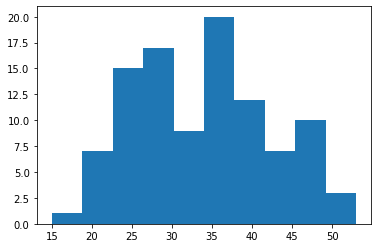

In [68]:
# Histogram
scores = [calculate_score(x) for x in subjects]
plt.hist(scores, bins=10)
plt.show()

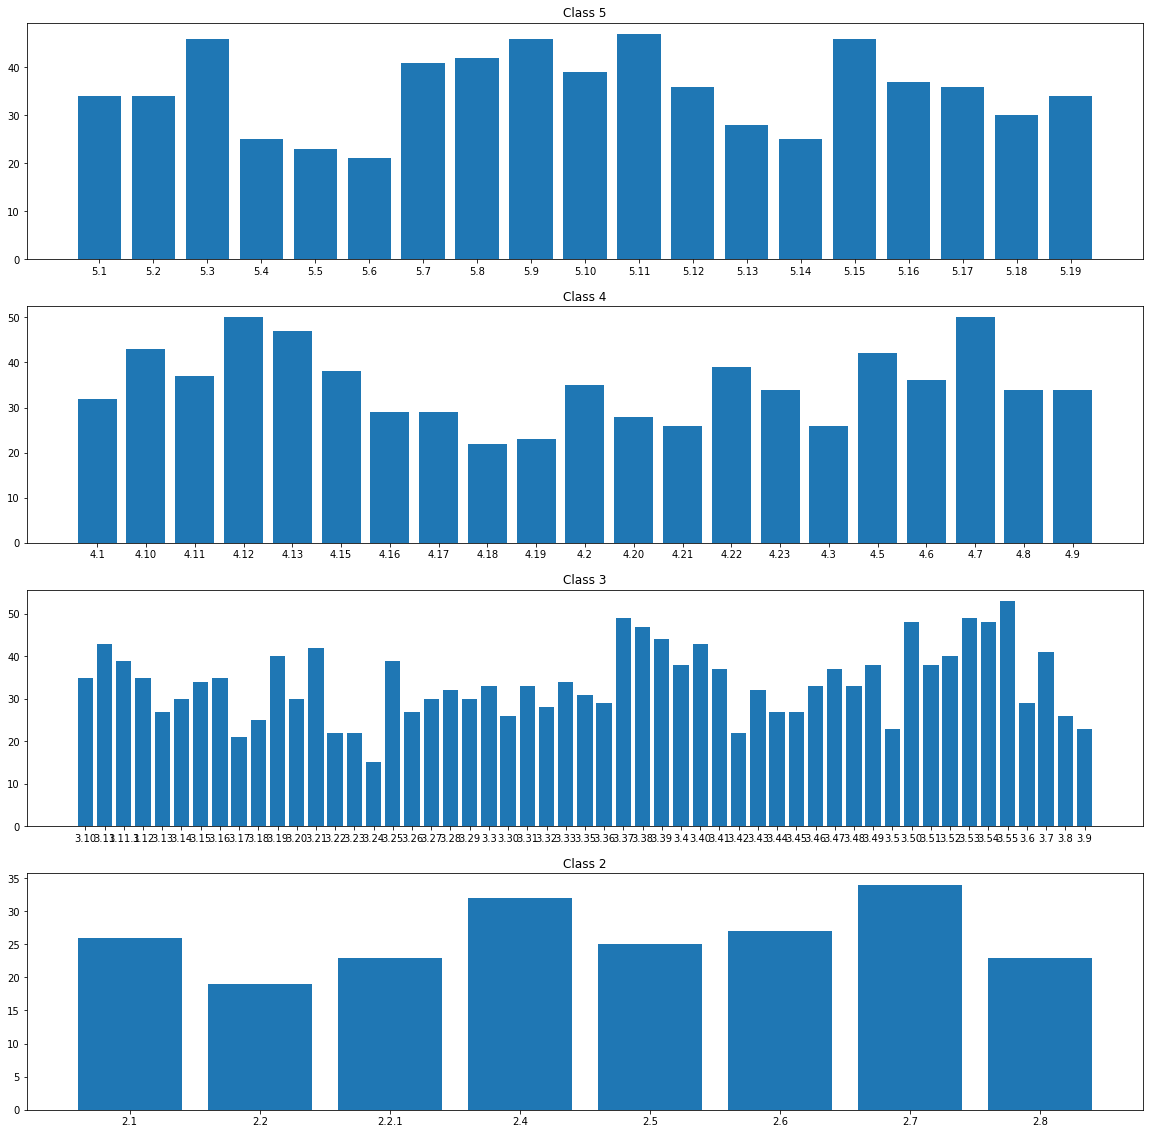

In [21]:
# Classwise bar plots
grade_5 = list(filter(lambda x: re.match(r"^5.\d*", x), subjects))
grade_4 = list(filter(lambda x: re.match(r"^4.\d*", x), subjects))
grade_3 = list(filter(lambda x: re.match(r"^3.\d*", x), subjects))
grade_2 = list(filter(lambda x: re.match(r"^2.\d*", x), subjects))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(20,20))

ax1.bar(subjects_grade_5, scores[:len(grade_5)])
ax1.set_title('Class 5')
ax2.bar(subjects_grade_4, scores[len(grade_5):len(grade_5)+len(grade_4)])
ax2.set_title('Class 4')
ax3.bar(subjects_grade_3, scores[len(grade_5)+len(grade_4):len(grade_5)+len(grade_4)+len(grade_3)])
ax3.set_title('Class 3')
ax4.bar(subjects_grade_2, scores[len(grade_5)+len(grade_4)+len(grade_3):])
ax4.set_title('Class 2')

plt.show()

## How the words were pronounced

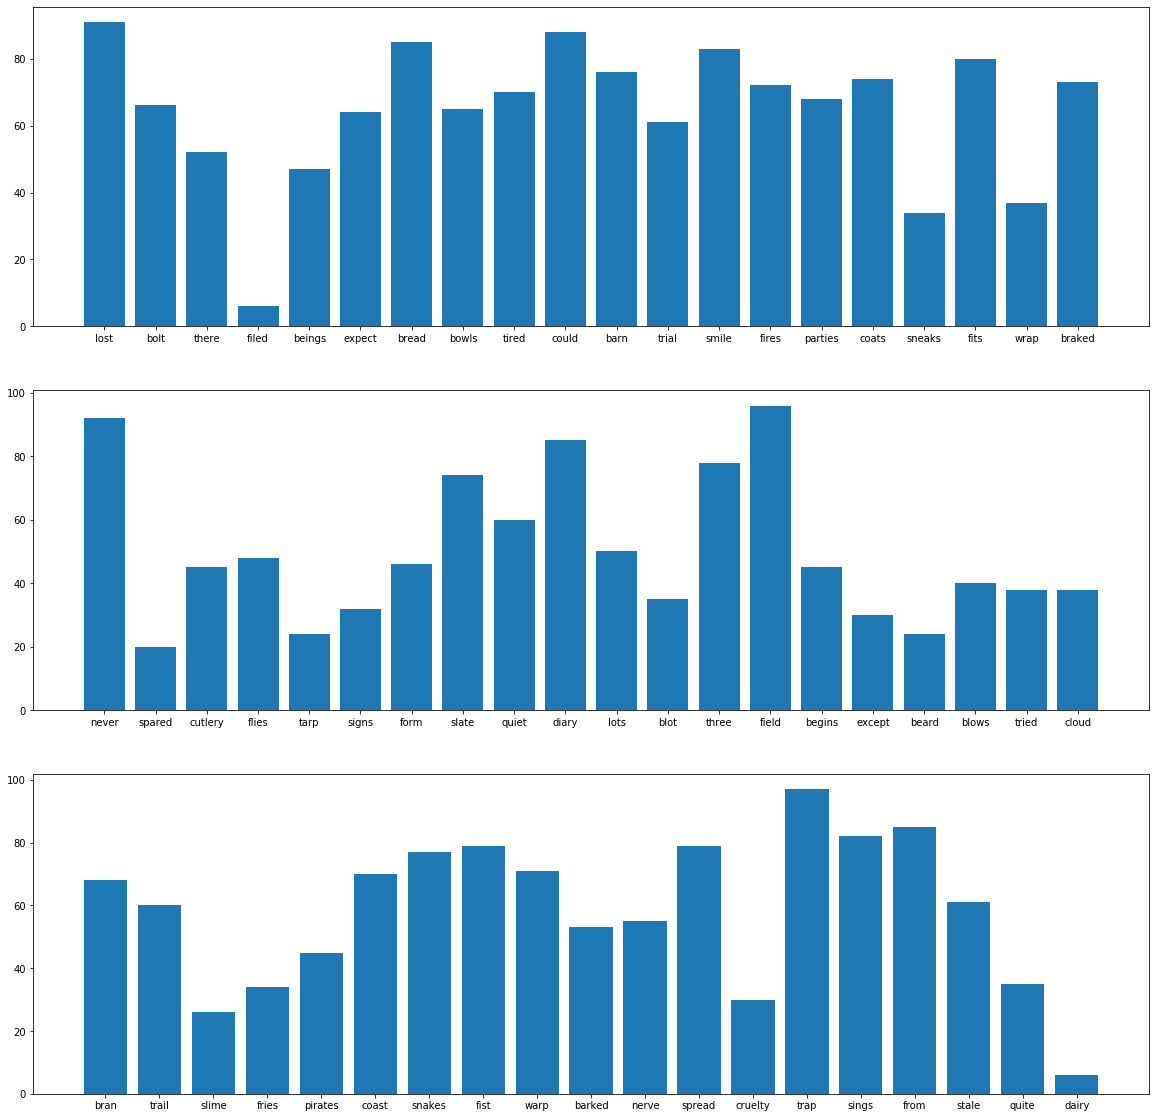

In [73]:
word_count = {x:0 for x in df[df['Subject'] == "original"].values.tolist()[0][1:]}

for _, row in data.items():
    for w in row:
        if w['original'] == w['pronounced']:
            word_count[w['original']] += 1

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,20))
ax1.bar(list(word_count.keys())[:20], list(word_count.values())[:20])
ax2.bar(list(word_count.keys())[20:40], list(word_count.values())[20:40])
ax3.bar(list(word_count.keys())[40:], list(word_count.values())[40:])

plt.show()